In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Conv2D,
    MaxPooling2D,
    Flatten,
    BatchNormalization,
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
train_generator = ImageDataGenerator(
    rotation_range=10, zoom_range=0.2, horizontal_flip=True, rescale=1 / 255
)

train_dataset = train_generator.flow_from_directory(
    directory="C:\\Users\\main\\Downloads\\archive\\train",
    target_size=(48, 48),
    class_mode="categorical",
    batch_size=16,
    shuffle=True,
    seed=10,
)

test_generator = ImageDataGenerator(rescale=1/255)
test_dataset = test_generator.flow_from_directory(
    directory='C:\\Users\\main\\Downloads\\archive\\test',
    target_size=(48, 48),
    class_mode='categorical',
    batch_size=1,
    shuffle=False,
    seed=10
)

# FER 데이터셋은 7가지의 감정 분류를 가짐, 디텍터는 32개 이미지는 48X48 셋을 가지고 있음
num_classes = 7
num_detectors = 32
width, height = 48, 48

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
# 이를 반영하는 망을 만들어 보도록 하자
network = Sequential()
network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))
network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))
network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))
network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))
network.add(Flatten())
network.add(Dense(2*2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))
network.add(Dense(2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))
network.add(Dense(num_classes, activation='softmax'))
network.summary()

# 이제 네트워크를 컴파일 하기
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습시 오버피팅을 방지하기 위해 정확도를 모니터링하여 조기에 학습을 종료시키는 인스턴스 정의 
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

# loss 제일 낮을 때 가중치 저장
filename = 'emotion_best.h5'
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True   # 가장 best 값만 저장합니다
                            )
epochs = 70
history= network.fit(train_dataset, epochs=epochs, validation_data=test_dataset, callbacks=[checkpoint, monitor_val_acc]).history
print('학습종료!')
network.save(filename)

score = network.evaluate(test_dataset)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_40 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_41 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                      

c:\Users\main\miniconda3\envs\deepface\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1795/1795 [==============================] - ETA: 0s - loss: 1.5079 - accuracy: 0.4109
Epoch 2: val_loss improved from 1.54235 to 1.47285, saving model to emotion_best.h5
1795/1795 [==============================] - 221s 123ms/step - loss: 1.5079 - accuracy: 0.4109 - val_loss: 1.4728 - val_accuracy: 0.4397
Epoch 3/70
1795/1795 [==============================] - ETA: 0s - loss: 1.3702 - accuracy: 0.4745
Epoch 3: val_loss improved from 1.47285 to 1.37013, saving model to emotion_best.h5
1795/1795 [==============================] - 215s 120ms/step - loss: 1.3702 - accuracy: 0.4745 - val_loss: 1.3701 - val_accuracy: 0.4765
Epoch 4/70
1795/1795 [==============================] - ETA: 0s - loss: 1.3084 - accuracy: 0.5031
Epoch 4: val_loss improved from 1.37013 to 1.28545, saving model to emotion_best.h5
1795/1795 [==============================] - 217s 121ms/step - loss: 1.3084 - accuracy: 0.5031 - val_loss: 1.2855 - val_accuracy: 0.5084
Epoch 5/70
1795/1795 [==============================] 

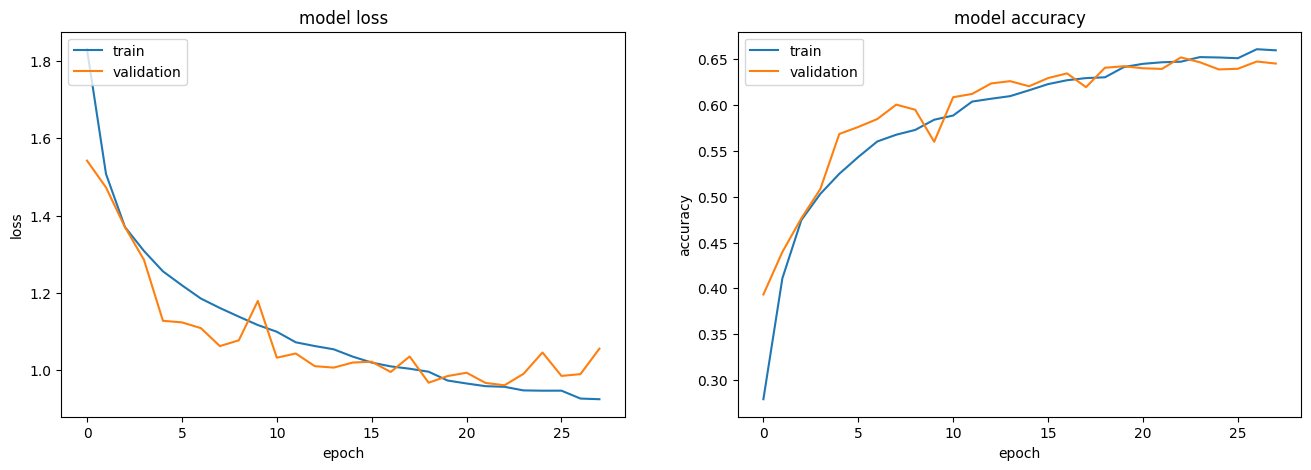

In [8]:
import pandas as pd #데이터를 분석 및 조작하기 위한 소프트웨어 라이브러리
import matplotlib.pyplot as plt #다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리

plt.figure(figsize=(16,5)) 
# 만들어진 모델에 대해 train dataset과 validation dataset의 loss 를 그래프로 표현
plt.subplot(1, 2, 1) 
plt.plot(history['loss']) 
plt.plot(history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='upper left')

# 만들어진 모델에 대해 train dataset과 validation dataset의 accuracy 를 그래프로 표현
plt.subplot(1, 2, 2) 
plt.plot(history['accuracy']) 
plt.plot(history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='upper left')